In [1]:
# XP Ninja Exercises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


Saving AB_NYC_2019.csv to AB_NYC_2019 (2).csv
Saving New_York_City_.png to New_York_City_ (1).png
Shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895

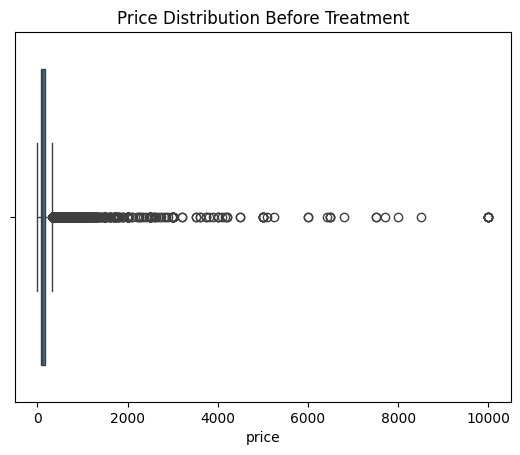

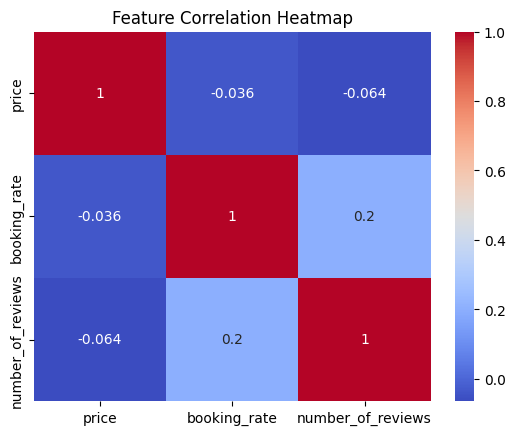

In [4]:
# Exercise 1

# Upload Airbnb dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
airbnb = pd.read_csv(filename)

print("Shape:", airbnb.shape)
print(airbnb.info())

# --- Handle Missing Values ---
airbnb["reviews_per_month"] = airbnb["reviews_per_month"].fillna(0)

# Remove or adjust code for non-existent column 'host_response_rate'
if "host_response_rate" in airbnb.columns:
    airbnb["host_response_rate"] = airbnb["host_response_rate"].fillna(
        airbnb["host_response_rate"].median()
    )

# --- Detect Outliers ---
sns.boxplot(x=airbnb["price"])
plt.title("Price Distribution Before Treatment")
plt.show()

# Cap prices at 99th percentile
upper_price = airbnb["price"].quantile(0.99)
airbnb["price"] = np.where(airbnb["price"] > upper_price, upper_price, airbnb["price"])

# --- Feature Engineering ---
airbnb["booking_rate"] = (
    airbnb["number_of_reviews"] / airbnb["availability_365"].replace(0, np.nan)
)

# Price per person only if column 'accommodates' exists
if "accommodates" in airbnb.columns:
    airbnb["price_per_person"] = airbnb["price"] / airbnb["accommodates"]

# --- Exploratory Correlation ---
features_to_check = ["price", "booking_rate", "number_of_reviews"]
if "price_per_person" in airbnb.columns:
    features_to_check.append("price_per_person")

corr = airbnb[features_to_check].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Saving 30-70cancerChdEtc.csv to 30-70cancerChdEtc (1).csv
Saving adolescentBirthRate.csv to adolescentBirthRate (1).csv
Saving airPollutionDeathRate.csv to airPollutionDeathRate (1).csv
Saving alcoholSubstanceAbuse.csv to alcoholSubstanceAbuse (1).csv
Saving atLeastBasicSanitizationServices.csv to atLeastBasicSanitizationServices (1).csv
Saving basicDrinkingWaterServices.csv to basicDrinkingWaterServices (1).csv
Saving basicHandWashing.csv to basicHandWashing (1).csv
Saving birthAttendedBySkilledPersonal.csv to birthAttendedBySkilledPersonal (1).csv
Saving cleanFuelAndTech.csv to cleanFuelAndTech (1).csv
Saving crudeSuicideRates.csv to crudeSuicideRates (1).csv
Saving dataAvailibilityForUhc.csv to dataAvailibilityForUhc (1).csv
Saving dentists.csv to dentists (1).csv
Saving eliminateViolenceAgainstWomen.csv to eliminateViolenceAgainstWomen (1).csv
Saving HALElifeExpectancyAtBirth.csv to HALElifeExpectancyAtBirth (1).csv
Saving HALeWHOregionLifeExpectancyAtBirth.csv to HALeWHOregionLife

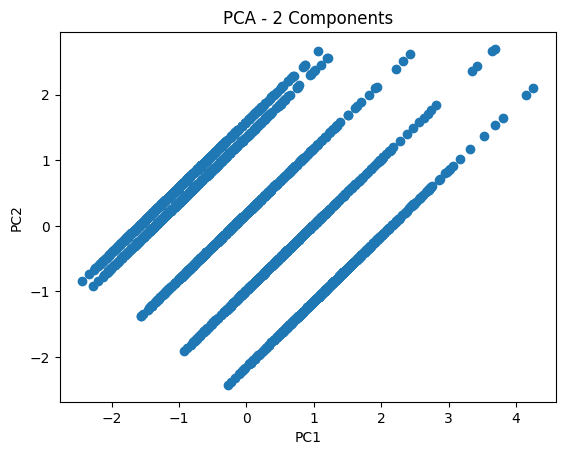

Explained variance ratio: [0.61544487 0.38455513]


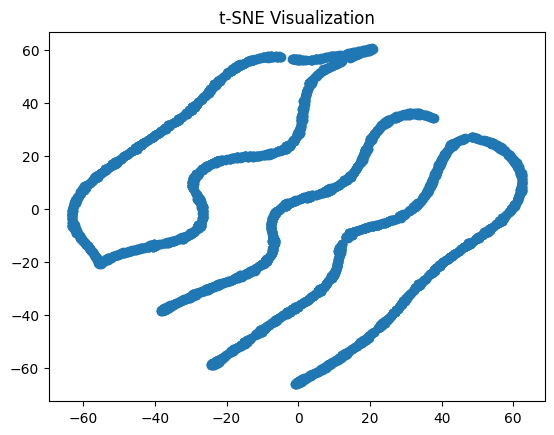


Analysis:
- PCA retains global variance efficiently and is fast.
- t-SNE captures local neighborhood structure and clusters better.
- Both methods reduce dimensions but give different insights.



In [6]:
# Exercise 2

# Upload Shop Customer dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
customers = pd.read_csv(filename)

print("Columns:", customers.columns.tolist())
print(customers.head())

# Ensure only numeric columns are used
num_cols = customers.select_dtypes(include=np.number).columns
if len(num_cols) == 0:
    raise ValueError("No numeric columns found for scaling and PCA/TSNE")

# Scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customers[num_cols])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA - 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title("t-SNE Visualization")
plt.show()

print("""\nAnalysis:
- PCA retains global variance efficiently and is fast.
- t-SNE captures local neighborhood structure and clusters better.
- Both methods reduce dimensions but give different insights.
""")


Saving Customers.csv to Customers.csv
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


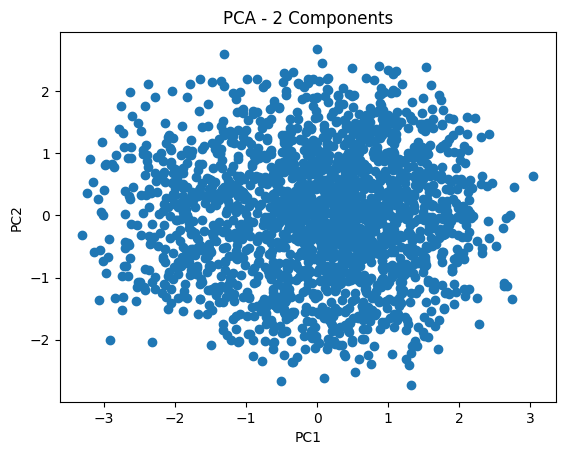

Explained variance ratio: [0.2420331  0.17389743]


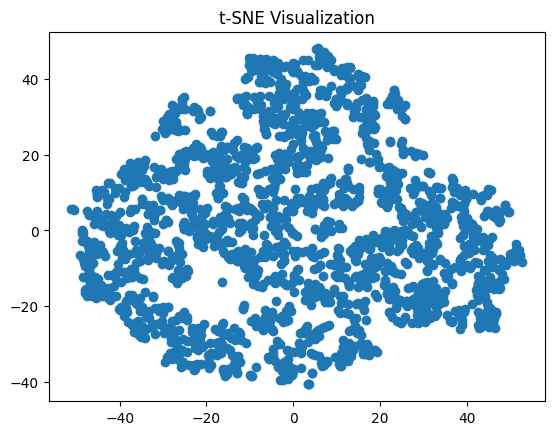


Analysis:
- PCA retains global variance efficiently and is fast.
- t-SNE captures local neighborhood structure and clusters better.
- Both methods reduce dimensions but give different insights.



In [9]:
# Exercise 3

# Upload Shop Customer dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
customers = pd.read_csv(filename)

print(customers.head())

# Scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customers.select_dtypes(include=np.number))

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA - 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title("t-SNE Visualization")
plt.show()

print("\nAnalysis:\n"
      "- PCA retains global variance efficiently and is fast.\n"
      "- t-SNE captures local neighborhood structure and clusters better.\n"
      "- Both methods reduce dimensions but give different insights.\n")
